# 🧠 Credit Scoring dengan Machine Learning

## 📘 Latar Belakang Studi Kasus

Sebagai Data Analyst baru di divisi peminjaman sebuah bank, saya ditugaskan untuk mengidentifikasi nasabah yang berisiko tinggi dalam pengajuan pinjaman. Tantangannya adalah jumlah nasabah yang besar, sehingga proses manual tidak memungkinkan.

> 💡 Solusi: Menerapkan **Machine Learning sederhana** yang dapat mempelajari pola dari data historis dan memprediksi kategori risiko nasabah secara otomatis dan cepat.

Dataset yang digunakan tersedia dalam format Excel dan dapat diakses melalui tautan resmi DQLab:

📂 [`credit_scoring_dqlab.xlsx`](https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx)

## 🎯 Tujuan Proyek
- Melakukan preprocessing dan eksplorasi data peminjam
- Membangun model klasifikasi dengan algoritma *supervised learning*
- Mengukur performa model menggunakan metrik seperti akurasi, precision, recall
- Menyajikan interpretasi hasil dengan visualisasi dan analisis mendalam

## ⚙️ Tools & Teknologi
- Python: Pandas, NumPy, Scikit-learn
- Visualisasi: Matplotlib, Seaborn
- IDE: Jupyter Notebook / Google Colab




Membaca dan Memahami Dataset

In [12]:
import pandas as pd
pd.set_option("display.max_column", 10)

In [13]:
#Membaca dataset
dataset_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
print(dataset_credit_scoring)

    kode_kontrak  pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0     AGR-000001                      295        YA                     48   
1     AGR-000011                      271        YA                     36   
2     AGR-000030                      159     TIDAK                     12   
3     AGR-000043                      210        YA                     12   
4     AGR-000049                      165     TIDAK                     36   
..           ...                      ...       ...                    ...   
895   AGR-010739                      112        YA                     48   
896   AGR-010744                      120        YA                     48   
897   AGR-010758                      166     TIDAK                     24   
898   AGR-010775                      196     TIDAK                     48   
899   AGR-010790                      204     TIDAK                     24   

     jumlah_tanggungan rata_rata_overdue  risk_rating  
0      

Data Preparation

In [14]:
#Membuat dataset
dataset  = dataset_credit_scoring[['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue', 'risk_rating']]
print(dataset.head())

#Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
print("\ndataset setelah kpr_aktif menjadi kolom numerik")
print(dataset.head())

   pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0                      295        YA                     48   
1                      271        YA                     36   
2                      159     TIDAK                     12   
3                      210        YA                     12   
4                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  

dataset setelah kpr_aktif menjadi kolom numerik
   pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0                      295          1                     48   
1                      271          1                     36   
2                      159          0                   

/tmp/ipython-input-14-2426250203.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
/tmp/ipython-input-14-2426250203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])


In [15]:
#Memeriksa nilai unik pada kolom rata_rata_overdue
print("Nilai unik pada kolom rata_rata_overdue")
print(dataset['rata_rata_overdue'].value_counts(), '\n')

#Mengubah data rata_rata_overdue menjadi numerik
mapping_dict = {
	"rata_rata_overdue": {
		"46 - 60 days": 60,
		"0 - 30 days": 30,
		"31 - 45 days": 45,
		"61 - 90 days": 90,
		"> 90 days": 91
	}
}

dataset = dataset.replace(mapping_dict)
print("\nNilai unik pada kolom rata_rata_overdue setelah dikonversi menjadi numerik")
print(dataset['rata_rata_overdue'].value_counts(), '\n')

#Menampilkan dataset dengan kolom yang sudah diubah
print(dataset.head())

Nilai unik pada kolom rata_rata_overdue
rata_rata_overdue
46 - 60 days    291
0 - 30 days     227
31 - 45 days    159
61 - 90 days    120
> 90 days       103
Name: count, dtype: int64 


Nilai unik pada kolom rata_rata_overdue setelah dikonversi menjadi numerik
rata_rata_overdue
60    291
30    227
45    159
90    120
91    103
Name: count, dtype: int64 

   pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0                      295          1                     48   
1                      271          1                     36   
2                      159          0                     12   
3                      210          1                     12   
4                      165          0                     36   

   jumlah_tanggungan  rata_rata_overdue  risk_rating  
0                  5                 90            4  
1                  5                 90            4  
2                  0                 30            1  
3                  3                 

/tmp/ipython-input-15-4076048943.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace(mapping_dict)


Menentukan Korelasi Data dengan Pearson Correlation

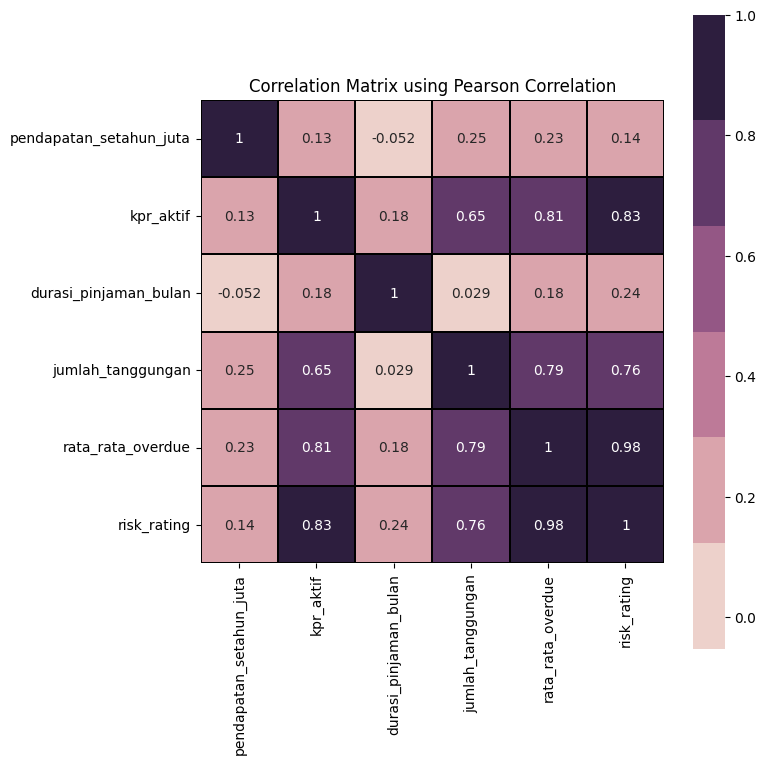

In [16]:
#Melihat korelasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Membangun heatmap
#f = gambar
#ax = axis
f, ax = plt.subplots(figsize = (8,8))
plt.title('Correlation Matrix using Pearson Correlation')

#Menampilkan nilai korelasi tiap variabel kedalam bentuk heatmap
sns.heatmap(dataset.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, linecolor='black', annot=True, cmap=sns.cubehelix_palette())
plt.tight_layout()
plt.show()

Karena variabel pendapatan_setahun_juta dan durasi_pinjaman_bulan memiliki korelasi yang rendah dengan risk_rating. Karena itu tidak akan menggunakan dua variabel tersebut

Menghapus Kolom Dengan Korelasi Rendah

In [17]:
#Menghapus kolom pendapatan_setahun_juta dan durasi_pinjaman_bulan
dataset = dataset.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan'], axis=1)
print(dataset.head())

   kpr_aktif  jumlah_tanggungan  rata_rata_overdue  risk_rating
0          1                  5                 90            4
1          1                  5                 90            4
2          0                  0                 30            1
3          1                  3                 60            3
4          0                  0                 45            2


Tahap Modelling dengan Algoritma Machine Learning - Naive Bayes

In [21]:
#Import library Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Input variabel x dengan drop kolom risk_rating, karena kolom risk_rating digunakan sebagai lavel (y) (dependen)
x = dataset.drop('risk_rating', axis= 1)

#Input variabel y dengan drop kolom label
y = dataset['risk_rating'].astype('category')

#Membagi data training dan data testing
from sklearn.model_selection import train_test_split

#splitting data train 80% test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Menjalankan data training dengan naive bayes
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

#Menjalankan data testing
y_predict = model_nb.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3]


1.0


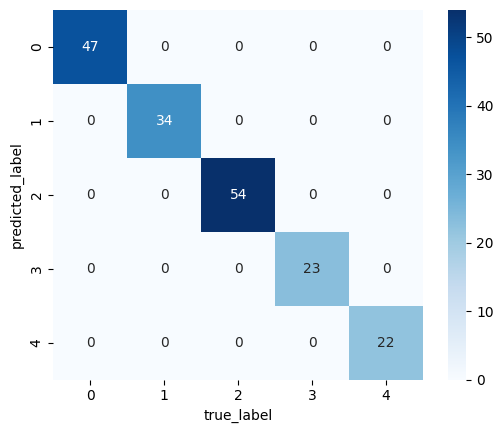

In [22]:
#Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

#Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true_label')
plt.ylabel('predicted_label')
plt.show()

Tahap Modelling dengan Algoritma Machine Learning - K-Nearest Neighbor (KNN)

In [23]:
#Import library KNN
from sklearn.neighbors import KNeighborsClassifier

#Membuat Objek model_knn
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

#Menjalankan data testing
y_predict = model_knn.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3]


1.0


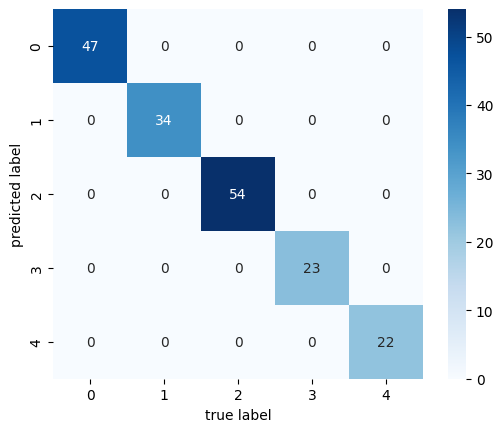

In [26]:
#Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

#Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Tahap Modelling dengan Algoritma Machine Learning - logistic regression

Accuracy score:  0.8722222222222222


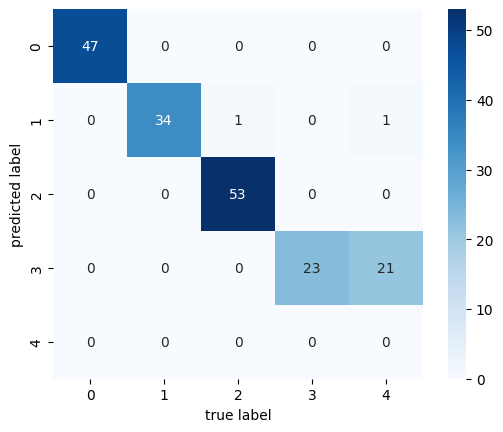

In [28]:
#Import library LogisticRegression
from sklearn.linear_model import LogisticRegression
# Membuat Objek model_lr
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(x_train, y_train)

# Menjalankan data testing
y_predict= model_lr.predict(x_test)

# Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_predict))

import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Tahap Modelling dengan Algoritma Machine Learning - SVM

Accuracy score:  1.0


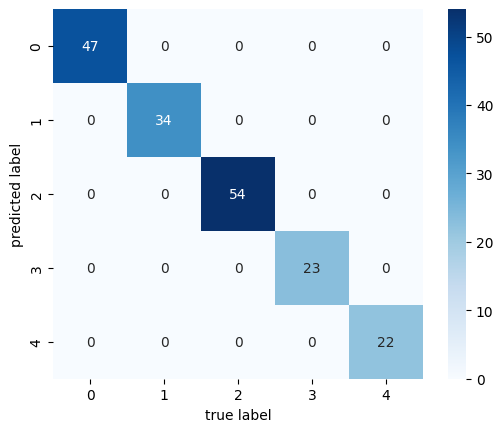

In [30]:
# Import library SVM
from sklearn import svm

# Membuat Objek model_svm
model_svm = svm.SVC(kernel='linear')
model_svm.fit(x_train, y_train)

# Menjalankan data testing
y_predict = model_svm.predict(x_test)

# Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_predict))

import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()